In [87]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./2018년 전국 상가업소 업력현황.xlsx')

In [13]:
old_data = data.copy()

In [7]:
data.head()

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1.0,2.0,42.0,39.0,16.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,0.0,6.0,18.0,35.0,44.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,0.0,5.0,12.0,86.0,20.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,0.0,1.0,1.0,1.0,2.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,0.0,0.0,1.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20625 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20625 non-null object
시군구      20625 non-null object
업종대분류    20625 non-null object
업종중분류    20625 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


In [4]:
import missingno as mino

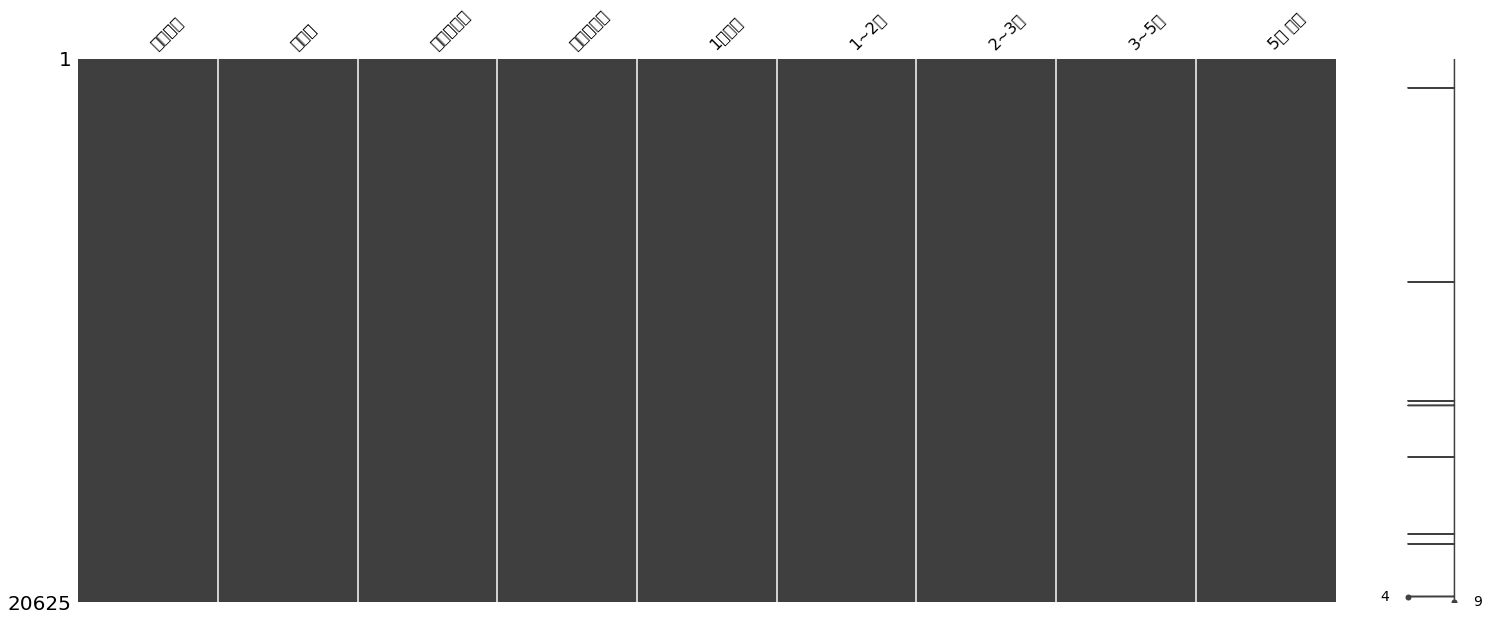

In [6]:
mino.matrix(data); # 너무 많아서 잘 안보여!

In [11]:
data.isna().all() # 모두 True면 True

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만     False
1~2년     False
2~3년     False
3~5년     False
5년 이상    False
dtype: bool

In [12]:
data.isna().any()

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만      True
1~2년      True
2~3년      True
3~5년      True
5년 이상     True
dtype: bool

In [14]:
data_na = data.dropna()

In [15]:
data = data_na.melt(data_na.columns[:4], var_name='년', value_name='수')

In [17]:
data.head()

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,1년미만,0.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,1년미만,0.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,1년미만,0.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,1년미만,0.0


In [22]:
data = data[data['수']!=0]

In [23]:
data.head()

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0
11,서울특별시,종로구,부동산,부동산임대,1년미만,1.0


## aggregation 분석

In [26]:
data.groupby('광역시도').count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,5691,5691,5691,5691,5691
경기도,12257,12257,12257,12257,12257
경상남도,5605,5605,5605,5605,5605
경상북도,6664,6664,6664,6664,6664
광주광역시,2058,2058,2058,2058,2058
대구광역시,3112,3112,3112,3112,3112
대전광역시,2040,2040,2040,2040,2040
부산광역시,5754,5754,5754,5754,5754
서울특별시,9933,9933,9933,9933,9933


In [32]:
data[data.iloc[:,-3] == '연극/영화/극장'].groupby('광역시도').count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,34,34,34,34,34
경기도,109,109,109,109,109
경상남도,41,41,41,41,41
경상북도,40,40,40,40,40
광주광역시,18,18,18,18,18
대구광역시,27,27,27,27,27
대전광역시,17,17,17,17,17
부산광역시,42,42,42,42,42
서울특별시,91,91,91,91,91


In [43]:
data[(data['광역시도']=='서울특별시') & (data['업종대분류']=='부동산')].groupby('시군구').count() # &쓸때 괄호 주의

,광역시도,업종대분류,업종중분류,년,수
시군구,,,,,
강남구,23,23,23,23,23
강동구,20,20,20,20,20
강북구,17,17,17,17,17
강서구,22,22,22,22,22
관악구,19,19,19,19,19
광진구,18,18,18,18,18
구로구,19,19,19,19,19
금천구,17,17,17,17,17
노원구,16,16,16,16,16


In [44]:
data[(data['광역시도']=='서울특별시') & (data['업종대분류']=='부동산')].groupby(['시군구', '업종중분류']).count()

광역시도  업종대분류  년  수
시군구  업종중분류                      
강남구  부동산관련서비스     3      3  3  3
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           5      5  5  5
     평가/개발/관리     5      5  5  5
강동구  부동산관련서비스     4      4  4  4
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     3      3  3  3
강북구  부동산관련서비스     1      1  1  1
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     4      4  4  4
강서구  부동산관련서비스     3      3  3  3
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           5      5  5  5
     평가/개발/관리     5      5  5  5
관악구  부동산관련서비스     3      3  3  3
     부동산임대        3      3  3  3
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     5      5  5  5
광진구  부동산관련서비스     3      3  3  3
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     3      3  3  3
...             ...    ... .. ..
영등포구 부동산관련서비스     4      4  4  4
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           4      4  4  4
     평가/개발/관리     5      5  5  5
용산구  부동산관련서비스     2      2  2  2
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     4      4  4  4
은평구  부동산관련서비스     1      1  1  1
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     3      3  3  3
종로구  부동산관련서비스     2      2  2  2
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     5      5  5  5
중구   부동산관련서비스     3      3  3  3
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     5      5  5  5
중랑구  부동산관련서비스     2      2  2  2
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           2      2  2  2
     평가/개발/관리     3      3  3  3

[125 rows x 4 columns]

In [46]:
t = data[(data['광역시도']=='서울특별시') & (data['업종대분류']=='부동산')].groupby(['시군구', '업종중분류'])

In [96]:
data['광역시도'].isin(['서울특별시','강원도']).head() # or 쓸 때 편하다

0     True
7     True
8     True
9     True
11    True
Name: 광역시도, dtype: bool

In [97]:
data.where(data['광역시도'].isin(['서울특별시','강원도'])).head()

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0
11,서울특별시,종로구,부동산,부동산임대,1년미만,1.0


In [48]:
'__iter__' in dir(t)

True

In [49]:
next(t) # iterator 아니다

TypeError: 'DataFrameGroupBy' object is not an iterator

In [51]:
len(t)

125

In [53]:
import inspect

In [54]:
print(inspect.getsource(pd.Grouper))

class Grouper(object):
    """
    A Grouper allows the user to specify a groupby instruction for a target
    object

    This specification will select a column via the key parameter, or if the
    level and/or axis parameters are given, a level of the index of the target
    object.

    These are local specifications and will override 'global' settings,
    that is the parameters axis and level which are passed to the groupby
    itself.

    Parameters
    ----------
    key : string, defaults to None
        groupby key, which selects the grouping column of the target
    level : name/number, defaults to None
        the level for the target index
    freq : string / frequency object, defaults to None
        This will groupby the specified frequency if the target selection
        (via key or level) is a datetime-like object. For full specification
        of available frequencies, please see `here
        <http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-alias

In [55]:
from collections import Counter

In [56]:
Counter('aaaabbbbse')

Counter({'a': 4, 'b': 4, 's': 1, 'e': 1})

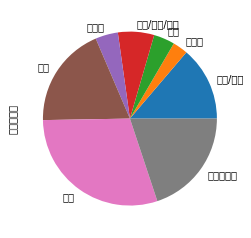

In [85]:
data['업종대분류'].value_counts(True, False).plot.pie()

In [69]:
x = Counter(data['업종대분류'])
x

Counter({'관광/여가/오락': 5323,
         '부동산': 3331,
         '생활서비스': 15738,
         '소매': 23597,
         '숙박': 3095,
         '스포츠': 2230,
         '음식': 14909,
         '학문/교육': 10891})

In [72]:
s = x.most_common()
s.sort()
s

[('관광/여가/오락', 5323),
 ('부동산', 3331),
 ('생활서비스', 15738),
 ('소매', 23597),
 ('숙박', 3095),
 ('스포츠', 2230),
 ('음식', 14909),
 ('학문/교육', 10891)]

In [91]:
t.agg(['count', np.std]) ## 동시에 여러 요소

수            
              count         std
시군구  업종중분류                     
강남구  부동산관련서비스     3   61.231800
     부동산임대        5   66.885723
     부동산중개        5  273.904545
     분양           5   85.963364
     평가/개발/관리     5  282.709745
강동구  부동산관련서비스     4   34.500000
     부동산임대        5    7.231874
     부동산중개        5  117.355017
     분양           3    2.081666
     평가/개발/관리     3   16.772994
강북구  부동산관련서비스     1         NaN
     부동산임대        4    3.403430
     부동산중개        5   24.263141
     분양           3    3.785939
     평가/개발/관리     4   19.551215
강서구  부동산관련서비스     3   80.541915
     부동산임대        4   16.268579
     부동산중개        5  100.231233
     분양           5    5.727128
     평가/개발/관리     5   50.147782
관악구  부동산관련서비스     3   35.510562
     부동산임대        3   14.364308
     부동산중개        5   84.662270
     분양           3    3.785939
     평가/개발/관리     5   13.535139
광진구  부동산관련서비스     3   30.022214
     부동산임대        4   14.651507
     부동산중개        5  128.002734
     분양           3   19.078784
     평가/개발/관리     3   50.229473
...             ...         ...
영등포구 부동산관련서비스     4   41.352146
     부동산임대        4   33.380383
     부동산중개        5   82.721219
     분양           4   18.625699
     평가/개발/관리     5   48.354938
용산구  부동산관련서비스     2   39.597980
     부동산임대        5   20.255863
     부동산중개        5   62.086230
     분양           3   10.785793
     평가/개발/관리     4   24.041631
은평구  부동산관련서비스     1         NaN
     부동산임대        4   11.445523
     부동산중개        5   51.143915
     분양           3    1.527525
     평가/개발/관리     3   20.550750
종로구  부동산관련서비스     2   15.556349
     부동산임대        5   13.754999
     부동산중개        5   34.705907
     분양           3   11.930353
     평가/개발/관리     5   45.871560
중구   부동산관련서비스     3    9.814955
     부동산임대        5   23.091124
     부동산중개        5   60.332413
     분양           3    5.859465
     평가/개발/관리     5   53.176122
중랑구  부동산관련서비스     2   48.083261
     부동산임대        5   10.158740
     부동산중개        5   45.754781
     분양           2    2.121320
     평가/개발/관리     3   33.201406

[125 rows x 2 columns]

In [94]:
t.transform('count').head()

,광역시도,업종대분류,년,수
8,5,5,5,5
9,5,5,5,5
11,5,5,5,5
103,5,5,5,5
105,5,5,5,5


In [99]:
data.notna().head() ## isna()의 반대

,광역시도,시군구,업종대분류,업종중분류,년,수
0,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
11,True,True,True,True,True,True


## Groupby 3개 
1. groupby
2. crosstab
3. pivot table

In [102]:
pd.crosstab(data['광역시도'], data['년'], values=data['수'], aggfunc='count')

년,1~2년,1년미만,2~3년,3~5년,5년 이상
광역시도,,,,,
강원도,779,1023,1082,1284,1523
경기도,2041,2229,2502,2687,2798
경상남도,821,898,1049,1307,1530
경상북도,876,1136,1260,1539,1853
광주광역시,363,383,418,439,455
대구광역시,509,574,632,686,711
대전광역시,330,365,437,451,457
부산광역시,873,1021,1128,1326,1406
서울특별시,1718,1728,2090,2158,2239


In [121]:
b = pd.crosstab(data['년'],data['광역시도'],  values=data['수'], aggfunc='count')

In [108]:
data.groupby(['년', '광역시도']).count().unstack() # 열을 행으로 바꿔야 함.

시군구                                                         ...   \
광역시도    강원도   경기도  경상남도  경상북도 광주광역시 대구광역시 대전광역시 부산광역시 서울특별시 세종특별자치시 ...    
년                                                                   ...    
1~2년    779  2041   821   876   363   509   330   873  1718      68 ...    
1년미만   1023  2229   898  1136   383   574   365  1021  1728      73 ...    
2~3년   1082  2502  1049  1260   418   632   437  1128  2090      89 ...    
3~5년   1284  2687  1307  1539   439   686   451  1326  2158      86 ...    
5년 이상  1523  2798  1530  1853   455   711   457  1406  2239      85 ...    

          수                                                           
광역시도  부산광역시 서울특별시 세종특별자치시 울산광역시 인천광역시  전라남도  전라북도 제주특별자치도  충청남도 충청북도  
년                                                                     
1~2년    873  1718      68   268   553   847   607     131   684  527  
1년미만   1021  1728      73   320   606  1141   800     152   887  615  
2~3년   1128  2090      89   362   753  1236   805     165   943  670  
3~5년   1326  2158      86   405   827  1466  1019     174  1148  800  
5년 이상  1406  2239      85   443   847  1810  1166     184  1307  931  

[5 rows x 68 columns]

- Stack은 col을 index로
- Unstack은 index를 col로 만든다.


In [114]:
# pivot table
data.pivot_table(values='수', index='년',aggfunc='count', margins=True) # aggfunc default는 평균값
# margin

,수
년,
1~2년,11995
1년미만,13951
2~3년,15621
3~5년,17802
5년 이상,19745
All,79114


-----------------

In [115]:
# !pip install pdvega
## vega를 통해 문법만 알면 그래프를 쉽게 그릴 수 있다.

  Stored in directory: C:\Users\skarn\AppData\Local\pip\Cache\wheels\64\67\6c\3faafbf516d2bdfab7b3efc6e5db7dcf8dce060ea9da8fbe62
  Stored in directory: C:\Users\skarn\AppData\Local\pip\Cache\wheels\bb\d1\fa\c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built pdvega vega3


In [116]:
import pdvega

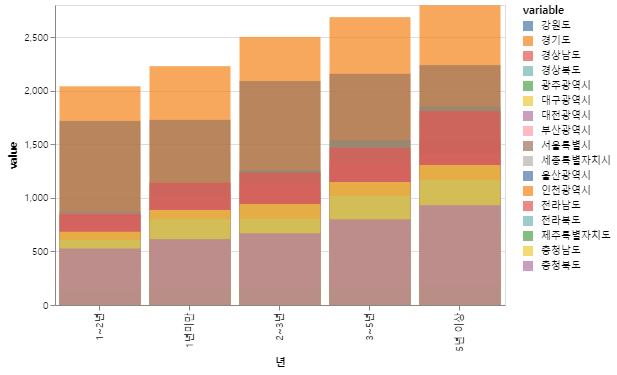

In [123]:
b.vgplot.bar() ## monkey patch